Imports

In [1583]:
# imports for libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import sklearn.linear_model as lm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

Loading the Data

In [1584]:
df = pd.read_csv('data/kc_house_data.csv', index_col=0).drop_duplicates() # (30155,25), 3 duplicated entries

## Inspecting

In [1585]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
id,,,,,,,,,,,,,,,,,,,,,
7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [1586]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30152 entries, 7399300360 to 9557800100
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30152 non-null  object 
 1   price          30152 non-null  float64
 2   bedrooms       30152 non-null  int64  
 3   bathrooms      30152 non-null  float64
 4   sqft_living    30152 non-null  int64  
 5   sqft_lot       30152 non-null  int64  
 6   floors         30152 non-null  float64
 7   waterfront     30152 non-null  object 
 8   greenbelt      30152 non-null  object 
 9   nuisance       30152 non-null  object 
 10  view           30152 non-null  object 
 11  condition      30152 non-null  object 
 12  grade          30152 non-null  object 
 13  heat_source    30120 non-null  object 
 14  sewer_system   30138 non-null  object 
 15  sqft_above     30152 non-null  int64  
 16  sqft_basement  30152 non-null  int64  
 17  sqft_garage    30152 non-null  int64

In [1587]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015200e+04,30152.000000,30152.000000,30152.000000,3.015200e+04,30152.000000,30152.000000,30152.000000,30152.000000,30152.000000,30152.000000,30152.000000,30152.000000,30152.000000
mean,1.108029e+06,3.413571,2.334671,2112.408729,1.672492e+04,1.543380,1809.839347,476.010812,330.227414,217.396856,1975.159591,90.931348,47.328477,-121.319050
std,8.946277e+05,0.981653,0.889548,974.052997,6.038545e+04,0.567615,878.325182,579.635101,285.770425,245.309503,32.065976,416.492770,1.433181,5.722034
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405361,-122.326050
50%,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551385,-122.225635
75%,1.300000e+06,4.000000,3.000000,2619.250000,1.057925e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669911,-122.116236
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


Correlations of all heatmap

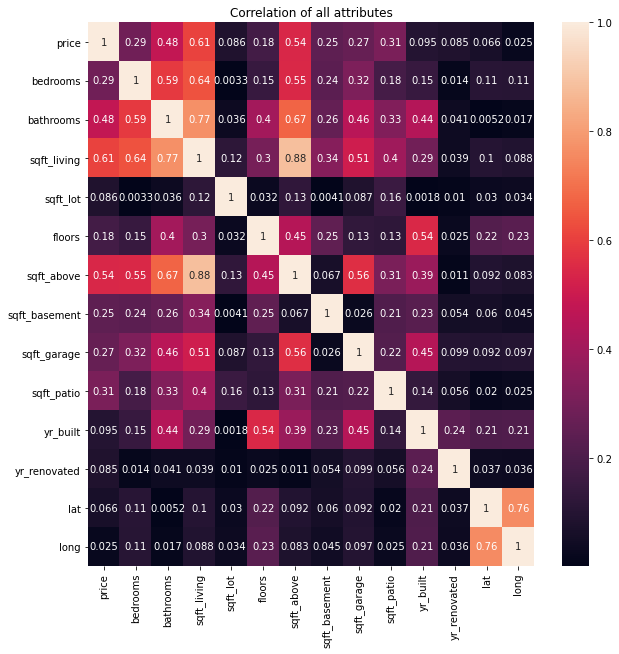

In [1588]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(abs(df.corr()),annot=True).set(title = "Correlation of all attributes");

Splitting the data into cat and num

In [1589]:
numeric_df = df.select_dtypes([int,float])
numeric_df = numeric_df.reset_index()
numeric_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
0,7399300360,675000.0,4,1.0,1180,7140,1.0,1180,0,0,40,1969,0,47.461975,-122.19052
1,8910500230,920000.0,5,2.5,2770,6703,1.0,1570,1570,0,240,1950,0,47.711525,-122.35591
2,1180000275,311000.0,6,2.0,2880,6156,1.0,1580,1580,0,0,1956,0,47.502045,-122.22520
3,1604601802,775000.0,3,3.0,2160,1400,2.0,1090,1070,200,270,2010,0,47.566110,-122.29020
4,8562780790,592500.0,2,2.0,1120,758,2.0,1120,550,550,30,2012,0,47.532470,-122.07188


In [1590]:
cat_df = df.select_dtypes(object)
cat_df = cat_df.reset_index()
cat_df.head()

,id,date,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,address
0,7399300360,5/24/2022,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,"2102 Southeast 21st Court, Renton, Washington ..."
1,8910500230,12/13/2021,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,"11231 Greenwood Avenue North, Seattle, Washing..."
2,1180000275,9/29/2021,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,"8504 South 113th Street, Seattle, Washington 9..."
3,1604601802,12/14/2021,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,"4079 Letitia Avenue South, Seattle, Washington..."
4,8562780790,8/24/2021,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,"2193 Northwest Talus Drive, Issaquah, Washingt..."


## Numeric Heatmap

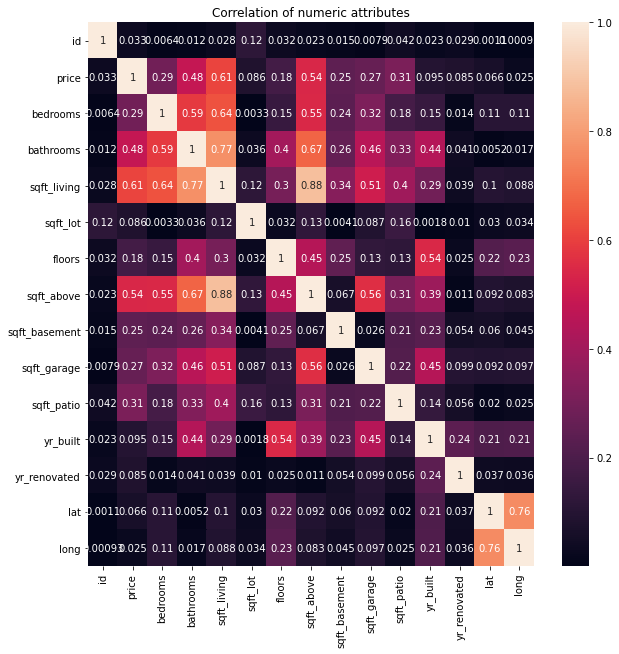

In [1591]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(abs(numeric_df.corr()),annot=True).set(title = "Correlation of numeric attributes");

(Cleaning addresses)

In [1592]:
# cat_df["address"].values

In [1593]:

# zips = []
# street_num = []
# street_name = []
# city = []
# state = []
# country = []

# # make the address data useable
# for i in cat_df["address"]:
#     # create variable to store partitioned strings from address column
#     # first will be used in certain iterations
#     info = i.split(",")
#     first = info[0].split(" ")

#     # store variables in appropriate lists
#     zips.append(info[-2][-5:])
#     street_num.append(first[0])
#     street_name.append(" ".join(first[1:len(first)]))
#     city.append(info[1][1:])
#     state.append(info[-2][1:-6])
#     country.append(info[-1][1:])

# # create columns from the lists in the cat_df
# cat_df["zips"] = zips
# cat_df["street_num"] = street_num
# cat_df["street_name"] = street_name
# cat_df["city"] = city
# cat_df["state"]= state
# cat_df["country"] = country

# cat_df.head()


(Cleaning dates)

In [1594]:
# month_int = []
# day_int = []
# year_int = []

# # split up the date column into a seperate month, day, year column for use as int
# for i in cat_df["date"]:
#     info = i.split("/")
#     month_int.append(int(info[0]))
#     day_int.append(int(info[1]))
#     year_int.append(int(info[2]))

# cat_df["mont_int"] = month_int
# cat_df["day_int"] = day_int
# cat_df["year_int"] = year_int

# cat_df.head()

# Cleaning zipcode and street name

In [1595]:
# cleaning categorical features
zips = []
street_name = []

# make the address data useable
for i in cat_df["address"]:
    # create variable to store partitioned strings from address column
    # first will be used in certain iterations
    info = i.split(",")
    first = info[0].split(" ")

    # store variables in appropriate lists
    zips.append(info[-2][-5:])
    street_name.append(" ".join(first[1:len(first)]))

# create columns from the lists in the cat_df
cat_df["zipcode"] = zips
cat_df["street_name"] = street_name

# remove zips codes outside King County
# https://www.ciclt.net/sn/clt/capitolimpact/gw_ziplist.aspx?FIPS=53033
ci_zips = ['98002 (Auburn)', '98092 (Auburn)', '98224 (Baring)', '98004 (Bellevue)', '98005 (Bellevue)', '98006 (Bellevue)', '98007 (Bellevue)', '98008 (Bellevue)', '98010 (Black Diamond)', '98011 (Bothell)', '98178 (Bryn Mawr-Skyway)', '98148 (Burien)', '98166 (Burien)', '98014 (Carnation)', '98077 (Cottage Lake)', '98042 (Covington)', '98198 (Des Moines)', '98019 (Duvall)', '98031 (East Hill-Meridian)', '98022 (Enumclaw)', '98058 (Fairwood)', '98024 (Fall City)', '98003 (Federal Way)', '98023 (Federal Way)', '98027 (Issaquah)', '98029 (Issaquah)', '98028 (Kenmore)', '98032 (Kent)', '98030 (Kent)', '98033 (Kirkland)', '98034 (Kirkland)', '98001 (Lakeland North)', '98038 (Maple Valley)', '98039 (Medina)', '98040 (Mercer Island)', '98045 (North Bend)', '98047 (Pacific)', '98050 (Preston)', '98051 (Ravensdale)', '98052 (Redmond)', '98055 (Renton)', '98056 (Renton)', '98057 (Renton)', '98059 (Renton)', '98074 (Sammamish)', '98075 (Sammamish)', '98188 (SeaTac)', '98199 (Seattle)', '98174 (Seattle)', '98154 (Seattle)', '98158 (Seattle)', '98164 (Seattle)', '98101 (Seattle)', '98102 (Seattle)', '98103 (Seattle)', '98104 (Seattle)', '98105 (Seattle)', '98106 (Seattle)', '98107 (Seattle)', '98108 (Seattle)', '98109 (Seattle)', '98112 (Seattle)', '98115 (Seattle)', '98116 (Seattle)', '98117 (Seattle)', '98118 (Seattle)', '98119 (Seattle)', '98121 (Seattle)', '98122 (Seattle)', '98125 (Seattle)', '98126 (Seattle)', '98133 (Seattle)', '98134 (Seattle)', '98136 (Seattle)', '98144 (Seattle)', '98155 (Shoreline)', '98177 (Shoreline)', '98288 (Skykomish)', '98065 (Snoqualmie)', '98168 (Tukwila)', '98053 (Union Hill-Novelty Hill)', '98195 (Univ Of Washington)', '98070 (Vashon)', '98146 (White Center)', '98072 (Woodinville)']
ci_zips = [x.split()[0] for x in ci_zips]
cat_df = cat_df.loc[[(i in ci_zips) for i in cat_df['zipcode'].values]]

#remove irrelevant features
cat_df = cat_df.drop(columns=['date', 'address'])

cat_df.head()

,id,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,zipcode,street_name
0,7399300360,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,98055,Southeast 21st Court
1,8910500230,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,98133,Greenwood Avenue North
2,1180000275,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,98178,South 113th Street
3,1604601802,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,98118,Letitia Avenue South
4,8562780790,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,98027,Northwest Talus Drive


In [1596]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29188 entries, 0 to 30151
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            29188 non-null  int64 
 1   waterfront    29188 non-null  object
 2   greenbelt     29188 non-null  object
 3   nuisance      29188 non-null  object
 4   view          29188 non-null  object
 5   condition     29188 non-null  object
 6   grade         29188 non-null  object
 7   heat_source   29159 non-null  object
 8   sewer_system  29175 non-null  object
 9   zipcode       29188 non-null  object
 10  street_name   29188 non-null  object
dtypes: int64(1), object(10)
memory usage: 2.7+ MB


## Cat_df: Encoding Categoricals

check NA

In [1597]:
# check for N/A
print(cat_df["waterfront"].isna().sum())
print(cat_df["greenbelt"].isna().sum())
print(cat_df["nuisance"].isna().sum())
print(cat_df["view"].isna().sum())
print(cat_df["condition"].isna().sum())
print(cat_df["grade"].isna().sum())
print(cat_df["heat_source"].isna().sum())
print(cat_df["sewer_system"].isna().sum())

cat_df = cat_df.dropna()


0
0
0
0
0
0
29
13


Get columns for encoding

In [1598]:
list(cat_df.columns)

['id',
 'waterfront',
 'greenbelt',
 'nuisance',
 'view',
 'condition',
 'grade',
 'heat_source',
 'sewer_system',
 'zipcode',
 'street_name']

Encode

In [1599]:
onehot_enc = OneHotEncoder(drop = 'first', sparse = False)
# ['waterfront','greenbelt', "nuisance", "view", "condition", "grade", "heat_source", "sewer_system", "zips", "year_int", "city"]
nominal_cols =  ['waterfront','greenbelt','nuisance','view','condition','grade','heat_source','sewer_system','zipcode']
x=onehot_enc.fit_transform(cat_df[nominal_cols])
names = list(onehot_enc.get_feature_names())
len(names)


106

Create encoded df

In [1600]:
enc_cat_df = pd.DataFrame(x)
names_dict = {i:names[i] for i in range(0,len(names))}
enc_cat_df = enc_cat_df.rename(columns=names_dict)
enc_cat_df

,x0_YES,x1_YES,x2_YES,x3_EXCELLENT,x3_FAIR,x3_GOOD,x3_NONE,x4_Fair,x4_Good,x4_Poor,...,x8_98155,x8_98166,x8_98168,x8_98177,x8_98178,x8_98188,x8_98198,x8_98199,x8_98224,x8_98288
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29143,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29144,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29145,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29146,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Testing numeric features

Defining Functions

In [1601]:
# model_cols = [0]

# X = wgn_enc_df[model_cols]
# y = numeric_df['price']

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42)
# model_wgn = LinearRegression()
# model_wgn.fit(X_train, y_train)

# model_wgn.score(X_train, y_train)

# model_wgn.score(X_test,y_test)
# model_wgn.intercept_
# expected1 = y_test
# predicted1 = model_wgn.predict(X_test)
# mse2 = sum((y_test - predicted1)**2)
# mse2
# y_hat = predicted1
# resid = (y_test - y_hat)

# fig, ax = plt.subplots()
# ax.scatter(x=range(y_hat.shape[0]),y=resid, alpha=0.1);

## Functions

In [3061]:
# def stats_test(data,X_main,y_main):
            
#     """
#     Define a function that can take in a dataframe (data), iterate through each column (X_main,) \
#     and conduct a simple linear regression against y (y_main). Train, test split is done, the data is scaled\
#     since this only works for numerics. The output is a dataframe with all the features in the rows, and \
#     statistical tests in the columns. An OLS summary is also printed for each column being iterated \
    
#     Parameters
#         ----------
#         data = a numeric df
#         X_main = features to test: independent variable
#         y_main = feature being measured: dependent variable

#         Returns
#         -------
#         df of stats measures for each feature

#     """

#     df = pd.DataFrame(columns = ["R_squared", "MSE", "Coef", "Intercept"])
#     for i in X_main:
#         X = data[[i]]
#         y = data[[y_main]]

#         # train test split
#         X_train, X_test, y_train, y_test = train_test_split(
#             X, y, test_size=0.2, random_state = 42)
        
#         # scale the data to normalize and fit
#         scaler = StandardScaler()
#         scaler.fit(X_train,y_train)

#         # transform
#         y_train_scaled = scaler.transform(y_train)
#         X_train_scaled = scaler.transform(X_train)
#         X_test_scaled = scaler.transform(X_test)

#         # form dataframes for test and train data
#         X_train_scaled = pd.DataFrame(X_train_scaled,
#                                     columns=X_train.columns,
#                                     index=X_train.index)
#         X_test_scaled = pd.DataFrame(X_test_scaled,
#                                     columns=X_test.columns,
#                                     index=X_test.index)
        
#         # instantiate a sk.learn simple linear model
#         model= LinearRegression()
#         model.fit(X_train_scaled, y_train)

#         # conduct stats tests
#         expected = np.array(y_test)
#         predicted= model.predict(X_test_scaled)
#         #mse = int(sum((expected - predicted)**2))
#         r2 = model.score(X_train_scaled, y_train)
#         coef = float(model.coef_)
#         intercept = model.intercept_

#         # create columns with stats variables
#         df.loc[len(df.index)+1] = [r2, mse, coef, intercept]
#         #model_OLS = sm.OLS(endog=y_train, exog=sm.add_constant(X_train_scaled)).fit()
#         #print(model_OLS.summary())

#     # set row names to correspond and reset index
#     df[y_main] = X_main
#     df.set_index([y_main], drop=True, inplace=True)
#     df = df.reset_index()

#     return df


In [3062]:
# all variables vs all variables and find highest R
def correlate(data):
    """
    Params:
    dataframe to be iterated with stats test
    Output = dictionary with dependent variables as a key to a dictionary with the independent variable and corresponding r2
    """
    highest_R = {}
    for i in data.columns:
        y = i
        model_cols = list(data.drop(columns = y, axis=1).columns)
        X_df = stats_test(data,model_cols,y)
        highest_R.update({y: {X_df.iloc[int(X_df.loc[X_df["R_squared"] == X_df["R_squared"].max()].index[0])][0]\
                            : X_df["R_squared"].max()}})
    
    return highest_R

In [3063]:
def MSE(data):
    """
    Params: 
    dataframe which will be iterated for a stats test

    Output = dictionary with dependent variables as the key to a dict with the least error variable and its corresponding error
    """
    MSE_lowest = {}
    for i in data.columns:
        y = i
        model_cols = list(data.drop(columns = y, axis=1).columns)
        X_df = stats_test(data,model_cols,y)
        MSE_lowest.update({y: {X_df.iloc[int(X_df.loc[X_df["MSE"] == X_df["MSE"].min()].index[0])][0]\
                            : X_df["MSE"].min()}})
        
    return MSE_lowest

Numeric df single variable test

In [1605]:
# single variable test for one dependent variable vs other features for numeric df
y = "price"
model_cols = list(numeric_df.drop(columns = y, axis=1).columns)
X_df = stats_test(numeric_df,model_cols,y)
X_df.sort_values(by="R_squared", ascending=False)

,price,R_squared,MSE,Coef,Intercept
3,sqft_living,0.362990,2786845826296059,540530.269019,[1105168.26491439]
6,sqft_above,0.285664,3225125675938817,479513.393154,[1105168.26491439]
2,bathrooms,0.222878,3457081874006902,423551.349963,[1105168.26491439]
9,sqft_patio,0.096227,4211345252806321,278305.703985,[1105168.26491439]
1,bedrooms,0.080313,4246558550842999,254252.784607,[1105168.26491439]
8,sqft_garage,0.069508,4368094804259179,236532.451119,[1105168.26491439]
7,sqft_basement,0.057804,4384464355696713,215701.338377,[1105168.26491439]
5,floors,0.030839,4537066294534626,157552.687801,[1105168.26491439]
10,yr_built,0.008825,4668274815767883,84281.483947,[1105168.26491439]
11,yr_renovated,0.007502,4687753142686419,77708.533302,[1105168.26491439]


## (Multiple tests at once)

In [1606]:
#x = correlate(numeric_df)
#x

In [1607]:
#x_1 = MSE(numeric_df)
#x_1

In [1608]:
# correlate(enc_cat_df)

In [1609]:
# MSE(enc_cat_df)

## Info

In [2322]:
numeric_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30152 entries, 0 to 30151
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30152 non-null  float64
 1   price          30152 non-null  float64
 2   bedrooms       30152 non-null  float64
 3   bathrooms      30152 non-null  float64
 4   sqft_living    30152 non-null  float64
 5   sqft_lot       30152 non-null  float64
 6   floors         30152 non-null  float64
 7   sqft_above     30152 non-null  float64
 8   sqft_basement  30152 non-null  float64
 9   sqft_garage    30152 non-null  float64
 10  sqft_patio     30152 non-null  float64
 11  yr_built       30152 non-null  float64
 12  yr_renovated   30152 non-null  float64
 13  lat            30152 non-null  float64
 14  long           30152 non-null  float64
dtypes: float64(15)
memory usage: 3.5 MB


In [2323]:
numeric_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
0,7.399300e+09,675000.0,4.0,1.0,1180.0,7140.0,1.0,1180.0,0.0,0.0,40.0,1969.0,0.0,47.461975,-122.19052
1,8.910500e+09,920000.0,5.0,2.5,2770.0,6703.0,1.0,1570.0,1570.0,0.0,240.0,1950.0,0.0,47.711525,-122.35591
2,1.180000e+09,311000.0,6.0,2.0,2880.0,6156.0,1.0,1580.0,1580.0,0.0,0.0,1956.0,0.0,47.502045,-122.22520
3,1.604602e+09,775000.0,3.0,3.0,2160.0,1400.0,2.0,1090.0,1070.0,200.0,270.0,2010.0,0.0,47.566110,-122.29020
4,8.562781e+09,592500.0,2.0,2.0,1120.0,758.0,2.0,1120.0,550.0,550.0,30.0,2012.0,0.0,47.532470,-122.07188


In [2324]:
enc_cat_df.dtypes.unique()

array([dtype('float64')], dtype=object)

In [2325]:
numeric_df.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
lat              0
long             0
dtype: int64

## Make numeric float for merge

In [2326]:
numeric_df = numeric_df.applymap(float)

In [2327]:
numeric_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
0,7.399300e+09,675000.0,4.0,1.0,1180.0,7140.0,1.0,1180.0,0.0,0.0,40.0,1969.0,0.0,47.461975,-122.19052
1,8.910500e+09,920000.0,5.0,2.5,2770.0,6703.0,1.0,1570.0,1570.0,0.0,240.0,1950.0,0.0,47.711525,-122.35591
2,1.180000e+09,311000.0,6.0,2.0,2880.0,6156.0,1.0,1580.0,1580.0,0.0,0.0,1956.0,0.0,47.502045,-122.22520
3,1.604602e+09,775000.0,3.0,3.0,2160.0,1400.0,2.0,1090.0,1070.0,200.0,270.0,2010.0,0.0,47.566110,-122.29020
4,8.562781e+09,592500.0,2.0,2.0,1120.0,758.0,2.0,1120.0,550.0,550.0,30.0,2012.0,0.0,47.532470,-122.07188


## Merge dfs

In [2886]:
enc_cat_df.columns.value_counts()

x4_Fair      1
x8_98178     1
x8_98148     1
x8_98112     1
x8_98168     1
            ..
x8_98107     1
x4_Poor      1
x7_PUBLIC    1
x8_98002     1
x8_98040     1
Length: 106, dtype: int64

In [2887]:
num_cat_df = numeric_df.join(enc_cat_df, how='inner')
num_cat_df = num_cat_df.drop(columns="id")
num_cat_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,...,x8_98155,x8_98166,x8_98168,x8_98177,x8_98178,x8_98188,x8_98198,x8_98199,x8_98224,x8_98288
0,675000.0,4.0,1.0,1180.0,7140.0,1.0,1180.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,920000.0,5.0,2.5,2770.0,6703.0,1.0,1570.0,1570.0,0.0,240.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,311000.0,6.0,2.0,2880.0,6156.0,1.0,1580.0,1580.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,775000.0,3.0,3.0,2160.0,1400.0,2.0,1090.0,1070.0,200.0,270.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,592500.0,2.0,2.0,1120.0,758.0,2.0,1120.0,550.0,550.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2888]:
num_cat_df.isna().sum().sum()

0

In [2889]:
numeric_df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio',
       'yr_built', 'yr_renovated', 'lat', 'long'],
      dtype='object')

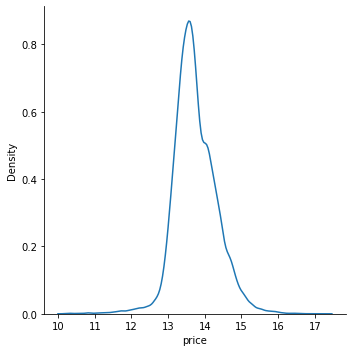

In [2890]:
sns.displot(np.log(num_cat_df["price"]), kind="kde");

In [2891]:
num_cat_df = num_cat_df.drop(num_cat_df.loc[num_cat_df["sqft_lot"] > 100000.0].index)
num_cat_df["sqft_lot"]

0         7140.0
1         6703.0
2         6156.0
3         1400.0
4          758.0
          ...   
29143     7410.0
29144    10200.0
29145     9692.0
29146    12308.0
29147     1043.0
Name: sqft_lot, Length: 28412, dtype: float64

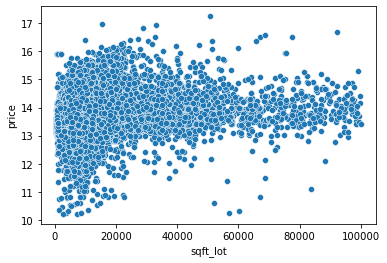

In [2892]:
sns.scatterplot(x=num_cat_df["sqft_lot"],y=np.log(num_cat_df["price"]));

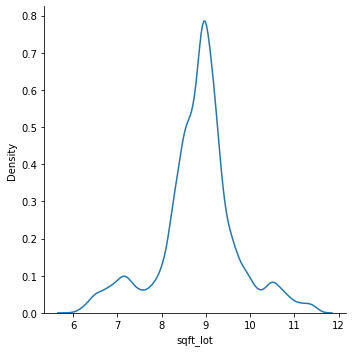

In [2893]:
sns.displot(np.log(num_cat_df["sqft_lot"]), kind="kde");

In [2894]:
#num_cat_df = num_cat_df.drop(num_cat_df.loc[num_cat_df["sqft_living"] > 8000.0].index)
num_cat_df["sqft_living"]

0        1180.0
1        2770.0
2        2880.0
3        2160.0
4        1120.0
          ...  
29143    1750.0
29144    2220.0
29145    2980.0
29146    4700.0
29147    1320.0
Name: sqft_living, Length: 28412, dtype: float64

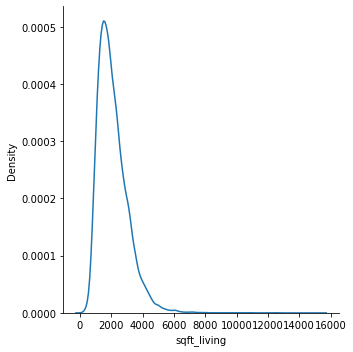

In [2895]:
sns.displot((num_cat_df["sqft_living"]), kind="kde");

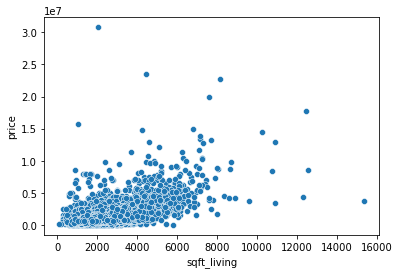

In [2896]:
sns.scatterplot(x=num_cat_df["sqft_living"],y=num_cat_df["price"]);

In [2897]:
# num_cat_df = num_cat_df[["price", 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio']].applymap(lambda x: np.log(x) if x !=0 else 0)
# num_cat_df.isna().sum().sum()
# num_cat_df.loc[num_cat_df["bathrooms"] == np.nan]
# [['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio']]

In [2898]:
numeric_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
0,7.399300e+09,675000.0,4.0,1.0,1180.0,7140.0,1.0,1180.0,0.0,0.0,40.0,1969.0,0.0,47.461975,-122.19052
1,8.910500e+09,920000.0,5.0,2.5,2770.0,6703.0,1.0,1570.0,1570.0,0.0,240.0,1950.0,0.0,47.711525,-122.35591
2,1.180000e+09,311000.0,6.0,2.0,2880.0,6156.0,1.0,1580.0,1580.0,0.0,0.0,1956.0,0.0,47.502045,-122.22520
3,1.604602e+09,775000.0,3.0,3.0,2160.0,1400.0,2.0,1090.0,1070.0,200.0,270.0,2010.0,0.0,47.566110,-122.29020
4,8.562781e+09,592500.0,2.0,2.0,1120.0,758.0,2.0,1120.0,550.0,550.0,30.0,2012.0,0.0,47.532470,-122.07188


In [2899]:
num_cat_df[['sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio']]

,sqft_above,sqft_basement,sqft_garage,sqft_patio
0,1180.0,0.0,0.0,40.0
1,1570.0,1570.0,0.0,240.0
2,1580.0,1580.0,0.0,0.0
3,1090.0,1070.0,200.0,270.0
4,1120.0,550.0,550.0,30.0
...,...,...,...,...
29143,1750.0,0.0,490.0,220.0
29144,1250.0,1170.0,460.0,810.0
29145,2980.0,0.0,660.0,100.0
29146,2870.0,1830.0,510.0,830.0


In [2900]:
num_cat_df["sqft_home"] = (num_cat_df['sqft_above'] + num_cat_df['sqft_basement'] + num_cat_df['sqft_garage'] + num_cat_df['sqft_patio'])
num_cat_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,...,x8_98166,x8_98168,x8_98177,x8_98178,x8_98188,x8_98198,x8_98199,x8_98224,x8_98288,sqft_home
0,675000.0,4.0,1.0,1180.0,7140.0,1.0,1180.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1220.0
1,920000.0,5.0,2.5,2770.0,6703.0,1.0,1570.0,1570.0,0.0,240.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3380.0
2,311000.0,6.0,2.0,2880.0,6156.0,1.0,1580.0,1580.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3160.0
3,775000.0,3.0,3.0,2160.0,1400.0,2.0,1090.0,1070.0,200.0,270.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2630.0
4,592500.0,2.0,2.0,1120.0,758.0,2.0,1120.0,550.0,550.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2250.0


In [2901]:
num_cat_df = num_cat_df.drop(columns=["sqft_above", "sqft_basement", "sqft_garage", "sqft_patio"])


In [2902]:
num_cat_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'yr_built', 'yr_renovated', 'lat', 'long',
       ...
       'x8_98166', 'x8_98168', 'x8_98177', 'x8_98178', 'x8_98188', 'x8_98198',
       'x8_98199', 'x8_98224', 'x8_98288', 'sqft_home'],
      dtype='object', length=117)

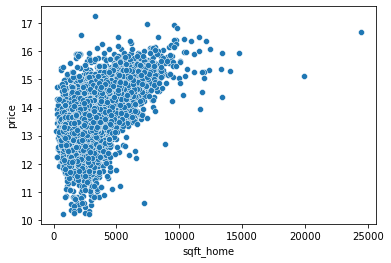

In [2903]:
sns.scatterplot(x=(num_cat_df["sqft_home"]),y=np.log(num_cat_df["price"]));


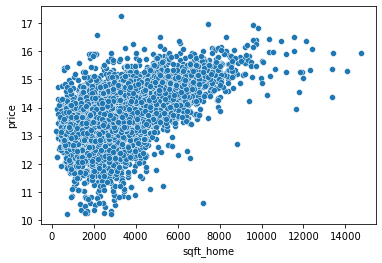

In [2904]:
num_cat_df = num_cat_df.drop(num_cat_df.loc[num_cat_df["sqft_home"] > 15000.0].index)
sns.scatterplot(x=(num_cat_df["sqft_home"]),y=np.log(num_cat_df["price"]));

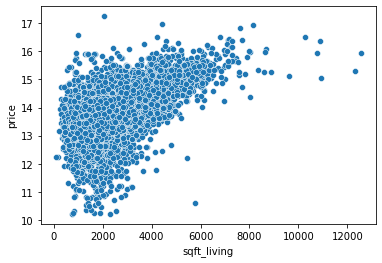

In [2905]:
sns.scatterplot(x=(num_cat_df["sqft_living"]),y=np.log(num_cat_df["price"]));

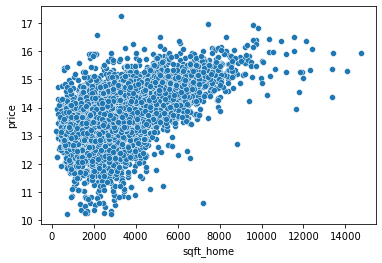

In [2906]:
#num_cat_df = num_cat_df.drop(num_cat_df.loc[num_cat_df["sqft_living"] > 10000.0].index)
sns.scatterplot(x=(num_cat_df["sqft_home"]),y=np.log(num_cat_df["price"]));

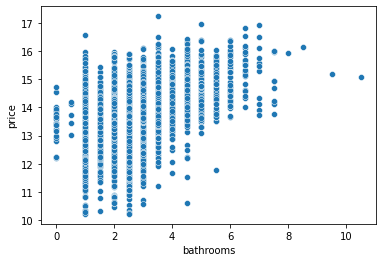

In [2907]:
sns.scatterplot(x=(num_cat_df["bathrooms"]),y=np.log(num_cat_df["price"]));

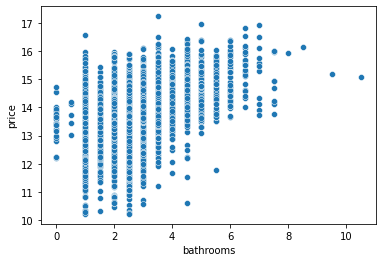

In [2908]:
# num_cat_df = num_cat_df.drop(num_cat_df.loc[num_cat_df["bathrooms"] == 0].index)
sns.scatterplot(x=(num_cat_df["bathrooms"]),y=np.log(num_cat_df["price"]));

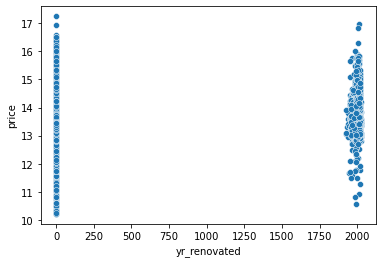

In [2909]:
sns.scatterplot(x=(num_cat_df["yr_renovated"]),y=np.log(num_cat_df["price"]));

In [2910]:
num_cat_df["renovated"] = [1.0 if x != 0 else 0.0 for x in num_cat_df["yr_renovated"]]
num_cat_df = num_cat_df.drop(columns="yr_renovated")

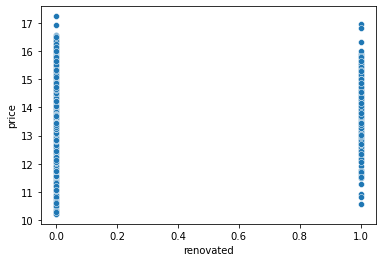

In [2911]:
sns.scatterplot(x=(num_cat_df["renovated"]),y=np.log(num_cat_df["price"]));

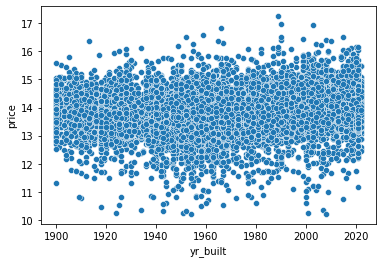

In [2912]:
sns.scatterplot(x=(num_cat_df["yr_built"]),y=np.log(num_cat_df["price"]));

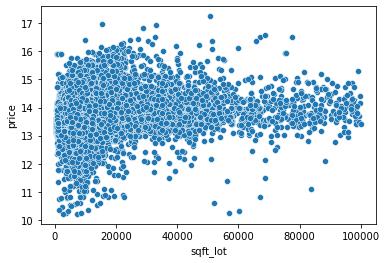

In [2913]:
sns.scatterplot(x=(num_cat_df["sqft_lot"]),y=np.log(num_cat_df["price"]));

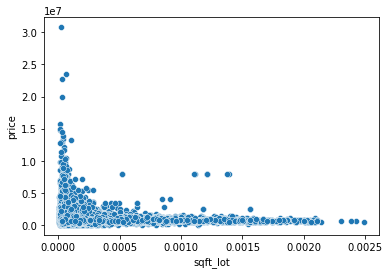

In [2914]:
num_cat_df = num_cat_df.drop(num_cat_df.loc[num_cat_df["sqft_lot"] > 1500000].index)
sns.scatterplot(x=1/(num_cat_df["sqft_lot"]),y=(num_cat_df["price"]));

<AxesSubplot:xlabel='x5_4 Low', ylabel='price'>

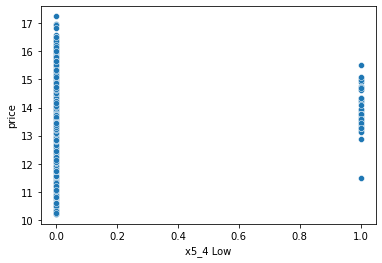

In [2915]:
sns.scatterplot(x=(num_cat_df["x5_4 Low"]),y=np.log(num_cat_df["price"]))

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
id,,,,,,,,,,,,,,,,,,,,,
7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585


# Testing iterations of variables

In [2916]:
y_main= "price"
to_drop = [y_main]
model_cols = list(num_cat_df.drop(columns=to_drop, axis=1).columns)
X_df = stats_test(num_cat_df,model_cols,y_main)
tester = X_df.sort_values(by="MSE", ascending=True)
tester

,price,R_squared,MSE,Coef,Intercept
2,sqft_living,0.374632,2797659695117727,543597.616877,[1096759.7797870468]
114,sqft_home,0.349776,2912514139384050,525254.664444,[1096759.7797870468]
1,bathrooms,0.230882,3455955240913365,426746.385489,[1096759.7797870468]
0,bedrooms,0.086045,4087070848249724,260518.098783,[1096759.7797870468]
4,floors,0.029674,4283561667931498,152989.242706,[1096759.7797870468]
...,...,...,...,...,...
73,x8_98057,0.000077,4469317478212769,7786.870017,[1096759.7797870468]
63,x8_98040,0.000127,4469514750785106,9993.329498,[1096759.7797870468]
7,long,0.000793,4470200909193543,-25006.569894,[1096759.7797870468]
57,x8_98031,0.000368,4470230757163080,17040.382636,[1096759.7797870468]


In [2917]:
test_names = [i for i in tester[y_main]]
test_names

['sqft_living',
 'sqft_home',
 'bathrooms',
 'bedrooms',
 'floors',
 'sqft_lot',
 'yr_built',
 'renovated',
 'lat',
 'x5_11 Excellent',
 'x5_4 Low',
 'x8_98224',
 'x8_98027',
 'x5_9 Better',
 'x8_98102',
 'x8_98033',
 'x8_98178',
 'x8_98007',
 'x6_Oil',
 'x1_YES',
 'x8_98070',
 'x8_98125',
 'x8_98288',
 'x8_98002',
 'x7_PUBLIC',
 'x8_98115',
 'x3_FAIR',
 'x8_98055',
 'x8_98011',
 'x8_98148',
 'x8_98010',
 'x8_98059',
 'x8_98144',
 'x4_Poor',
 'x6_Gas',
 'x8_98056',
 'x8_98106',
 'x8_98116',
 'x8_98053',
 'x8_98146',
 'x8_98107',
 'x3_GOOD',
 'x8_98005',
 'x5_8 Good',
 'x8_98177',
 'x8_98103',
 'x5_3 Poor',
 'x8_98168',
 'x3_NONE',
 'x5_2 Substandard',
 'x5_13 Mansion',
 'x8_98019',
 'x8_98050',
 'x8_98108',
 'x8_98051',
 'x8_98072',
 'x8_98077',
 'x8_98038',
 'x8_98039',
 'x7_PUBLIC RESTRICTED',
 'x7_PRIVATE RESTRICTED',
 'x8_98119',
 'x8_98058',
 'x8_98155',
 'x8_98028',
 'x8_98126',
 'x8_98105',
 'x4_Good',
 'x5_12 Luxury',
 'x8_98006',
 'x6_Electricity/Solar',
 'x8_98109',
 'x2_YES'

In [2918]:
y_main

'price'

In [2923]:
X_train

Index(['sqft_living', 'sqft_home', 'bathrooms', 'bedrooms', 'floors',
       'sqft_lot', 'yr_built', 'renovated', 'lat', 'x5_11 Excellent',
       ...
       'x8_98118', 'x5_6 Low Average', 'x8_98133', 'x8_98065', 'x8_98022',
       'x8_98057', 'x8_98040', 'long', 'x8_98031', 'x8_98024'],
      dtype='object', length=116)

In [2919]:
X = num_cat_df[test_names]
y = np.log(num_cat_df[[y_main]])

# form dataframes for test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
# instantiate a sk.learn simple linear model
model= LinearRegression()
model.fit(X_train, y_train)

# conduct stats tests
expected = np.array(y_test)
predicted= model.predict(X_test)
mse = int(sum((expected - predicted)**2))
r2 = model.score(X_train, y_train)
#coef = float(model.coef_)
intercept = model.intercept_

# create columns with stats variables
model_OLS = sm.OLS(endog=y_train, exog=sm.add_constant(X_train)).fit()
print(model_OLS.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     147.5
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:48:30   Log-Likelihood:                -13424.
No. Observations:               22728   AIC:                         2.708e+04
Df Residuals:                   22612   BIC:                         2.801e+04
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    18.40

In [2920]:
y_main

'price'

In [2921]:
X = num_cat_df[test_names]
y = np.log(num_cat_df[[y_main]])

# form dataframes for test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
# scale the data to normalize and fit
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# form dataframes for test and train data
X_train_scaled = pd.DataFrame(X_train_scaled,
                            columns=X_train.columns,
                            index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled,
                            columns=X_test.columns,
                            index=X_test.index)
        
# instantiate a sk.learn simple linear model
model= LinearRegression()
model.fit(X_train_scaled, y_train)

# conduct stats tests
expected = np.array(y_test)
predicted= model.predict(X_test_scaled)
mse = int(sum((expected - predicted)**2))
r2 = model.score(X_train_scaled, y_train)
#coef = float(model.coef_)
intercept = model.intercept_

# create columns with stats variables
model_OLS = sm.OLS(endog=y_train, exog=sm.add_constant(X_train_scaled)).fit()
print(model_OLS.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     147.5
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:48:31   Log-Likelihood:                -13424.
No. Observations:               22728   AIC:                         2.708e+04
Df Residuals:                   22612   BIC:                         2.801e+04
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    13.72

# Testing for significance

In [ ]:
test_num_cat_df = num_cat_df.drop(columns=to_drop)
test_num_cat_df.head()

,price,bedrooms,bathrooms,floors,yr_built,lat,long,x0_YES,x1_YES,x2_YES,...,x8_98155,x8_98166,x8_98168,x8_98177,x8_98178,x8_98188,x8_98198,x8_98199,x8_98224,x8_98288
0,675000.0,4.0,1.0,1.0,1969.0,47.461975,-122.19052,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,920000.0,5.0,2.5,1.0,1950.0,47.711525,-122.35591,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,311000.0,6.0,2.0,1.0,1956.0,47.502045,-122.22520,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,775000.0,3.0,3.0,2.0,2010.0,47.566110,-122.29020,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,592500.0,2.0,2.0,2.0,2012.0,47.532470,-122.07188,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
output_R2 = correlate(test_num_cat_df)

In [ ]:
values = []
for i in output_R2.values():
    values.append(list(i.values()))

values.sort(reverse=True)

count = 20
keys = {}
for c in range(0,count):
    for key, value in output_R2.items():
        for i in value.values():
            if values[c][0] == i:
                keys.update({key:value})
            

keys

{'lat': {'long': 0.5871327701452853},
 'long': {'lat': 0.5871327701452853},
 'bathrooms': {'bedrooms': 0.35139641854867654},
 'bedrooms': {'bathrooms': 0.3513964185486763},
 'yr_built': {'floors': 0.2997818647868443},
 'floors': {'yr_built': 0.29978186478684377},
 'x5_8 Good': {'x5_7 Average': 0.2867014744057421},
 'x5_7 Average': {'x5_8 Good': 0.286701474405742},
 'x0_YES': {'x3_EXCELLENT': 0.2657001014287832},
 'x3_EXCELLENT': {'x0_YES': 0.2657001014287831},
 'x6_Oil': {'x6_Gas': 0.24854831125060872},
 'x6_Gas': {'x6_Oil': 0.2485483112506085},
 'price': {'bathrooms': 0.234274493257426},
 'x3_GOOD': {'x3_NONE': 0.22528577449435738},
 'x3_NONE': {'x3_GOOD': 0.22528577449435727},
 'x5_9 Better': {'x5_7 Average': 0.0914966386402154},
 'x5_6 Low Average': {'x5_7 Average': 0.07072988836490346},
 'x5_3 Poor': {'x7_PRIVATE RESTRICTED': 0.05549123401023737},
 'x7_PRIVATE RESTRICTED': {'x5_3 Poor': 0.05549123401023681},
 'x3_FAIR': {'x3_NONE': 0.055036432724217876}}

In [ ]:
outputMSE = MSE(test_num_cat_df)

In [ ]:
values = []
for i in outputMSE.values():
    values.append(list(i.values()))

values.sort(reverse=False)

count = len(outputMSE)
keys = {}
for c in range(0,count):
    for key, value in outputMSE.items():
        for i in value.values():
            if values[c][0] == i:
                keys.update({key:value})
keys

{'x5_2 Substandard': {'price': 0},
 'x6_Oil/Solar': {'price': 0},
 'x7_PUBLIC RESTRICTED': {'price': 0},
 'x8_98050': {'price': 0},
 'x8_98224': {'price': 0},
 'x6_Other': {'floors': 1},
 'x7_PRIVATE RESTRICTED': {'price': 1},
 'x5_13 Mansion': {'price': 2},
 'x5_3 Poor': {'price': 2},
 'x5_4 Low': {'price': 4},
 'x8_98288': {'price': 6},
 'x6_Electricity/Solar': {'price': 8},
 'x4_Poor': {'x5_3 Poor': 9},
 'x8_98039': {'price': 12},
 'x6_Gas/Solar': {'price': 15},
 'x8_98047': {'price': 15},
 'x8_98051': {'price': 15},
 'x5_12 Luxury': {'price': 18},
 'x8_98148': {'price': 20},
 'x8_98024': {'price': 22},
 'x8_98102': {'price': 22},
 'x8_98014': {'price': 23},
 'x8_98057': {'price': 23},
 'x8_98007': {'price': 27},
 'x8_98109': {'price': 29},
 'x8_98032': {'price': 32},
 'x8_98070': {'x0_YES': 33},
 'x8_98188': {'price': 33},
 'x3_FAIR': {'x3_NONE': 36},
 'x8_98119': {'price': 36},
 'x8_98005': {'price': 43},
 'x8_98019': {'price': 43},
 'x4_Fair': {'price': 45},
 'x8_98112': {'price'

In [3032]:
## brendan 


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le_cols = ['waterfront', 'greenbelt', 'nuisance']

df[le_cols] = df[le_cols].apply(lambda x: le.fit_transform(x))


In [3033]:

zips = []
street_name = []
for i in df["address"]:
    # create variable to store partitioned strings from address column
    # first will be used in certain iterations
    info = i.split(",")
    first = info[0].split(" ")

    # store variables in appropriate lists
    zips.append(info[-2][-5:])
    street_name.append(" ".join(first[1:len(first)]))

# create columns from the lists in the cat_df
df["zipcode"] = zips
df["street_name"] = street_name


In [3034]:
df.view

id
7399300360    4
8910500230    0
1180000275    0
1604601802    0
8562780790    4
             ..
7834800180    4
194000695     2
7960100080    4
2781280080    4
9557800100    4
Name: view, Length: 30152, dtype: int64

In [3035]:
df['condition'] = le.fit_transform(df['condition'])
df['view'] = le.fit_transform(df['view'])
df['grade'] = le.fit_transform(df['grade'])

In [3036]:
ohe = OneHotEncoder(sparse = False, handle_unknown= 'ignore')
ohe_df = ohe.fit_transform(df[['zipcode']])
ohe_df = pd.DataFrame(ohe_df, columns = ohe.get_feature_names())
ohe_df

,x0_01541,x0_02066,x0_02134,x0_02149,x0_02341,x0_02568,x0_02645,x0_02790,x0_02852,x0_02916,...,x0_98422,x0_98663,x0_99202,x0_99203,x0_99223,x0_99403,x0_99501,x0_99504,x0_99701,x0_99705
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3037]:
model_cols = [
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'greenbelt',
 'nuisance',
 'view',
 'condition',
 'grade',
'zipcode',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'yr_renovated']


model_df = pd.concat([df[model_cols].reset_index(), ohe_df], 1)

y = df['price'].reset_index()


In [3038]:
model_df.iloc[:,10:]

,condition,grade,zipcode,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,x0_01541,...,x0_98422,x0_98663,x0_99202,x0_99203,x0_99223,x0_99403,x0_99501,x0_99504,x0_99701,x0_99705
0,2,10,98055,1180,0,0,40,1969,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,10,98133,1570,1570,0,240,1950,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,10,98178,1580,1580,0,0,1956,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,12,98118,1090,1070,200,270,2010,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,10,98027,1120,550,550,30,2012,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30147,2,11,98103,1600,1130,0,210,1921,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30148,0,10,98116,2020,0,0,520,2011,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30149,0,10,98122,940,920,240,110,1995,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30150,0,11,98055,1830,740,480,100,2006,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3039]:
y

,id,price
0,7399300360,675000.0
1,8910500230,920000.0
2,1180000275,311000.0
3,1604601802,775000.0
4,8562780790,592500.0
...,...,...
30147,7834800180,1555000.0
30148,194000695,1313000.0
30149,7960100080,800000.0
30150,2781280080,775000.0


In [3040]:
lr = LinearRegression()
lr.fit(model_df,y[['price']])
lr.score(model_df, y[['price']])

0.6465779006508419

In [3041]:
lr.coef_.shape

(1, 418)

In [3042]:
lr.coef_[0]

array([-1.42339992e-06, -6.45410213e+04,  5.18738737e+04,  1.88565786e+02,
        4.60427410e-01, -1.02392345e+05,  1.13280220e+06,  3.58349815e+04,
       -4.10658646e+04, -4.45043221e+04,  2.75858561e+04, -3.44054118e+04,
       -2.49021162e+00,  2.85683472e+02,  7.97801778e+01,  2.51254420e+01,
        1.15735293e+02,  9.35065918e+02,  5.47642590e+01, -1.19694522e+05,
       -3.46509004e+04, -1.17195892e+05,  2.75024040e+05,  1.08539417e+05,
       -6.90435185e+04,  1.68115113e+05,  3.72768435e+05, -9.68111715e+04,
        3.04976819e+05, -1.74356964e+05,  3.57600173e+05, -5.75016658e+04,
        3.17861827e+05,  7.60931923e+05, -1.48292919e+05,  1.31693067e+06,
       -6.73799765e+05,  2.38611488e+05,  2.22776142e+05,  6.15928285e+04,
       -7.56693416e+04,  8.98620164e+04, -9.59711924e+02, -8.13002115e+04,
       -3.21704938e+05,  1.70808102e+06, -8.18289815e+04, -1.42538753e+04,
        9.96134017e+04, -1.72561977e+05,  4.41252604e+04, -1.96849780e+05,
        2.00762819e+04,  

In [3043]:
list(lr.coef_[0]).index(lr.coef_[0].max())

415

In [3044]:
model_df.columns.to_list()[414]

'x0_99501'

In [3045]:
pd.Series(lr.coef_[0]).sort_values(ascending=False).index

Int64Index([415, 346, 237, 325,  45, 242,  35,  55, 189,  83,
            ...
            408, 196, 203,  89, 160, 171, 174, 245, 231, 147],
           dtype='int64', length=418)

In [3046]:
X = model_df[model_cols]
y = np.log(y[["price"]])

# form dataframes for test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        


In [3055]:
# scale the data to normalize and fit
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# form dataframes for test and train data
X_train_scaled = pd.DataFrame(X_train_scaled,
                            columns=X_train.columns,
                            index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled,
                            columns=X_test.columns,
                            index=X_test.index)


ohe = OneHotEncoder(sparse = False, handle_unknown= 'ignore')
ohe_df = ohe.fit_transform(X_train[['zipcode']])
ohe_df = pd.DataFrame(ohe_df, columns = ohe.get_feature_names())



ohe_df_test = ohe.transform(X_test[['zipcode']])
ohe_df_test = pd.DataFrame(ohe_df_test, columns = ohe.get_feature_names())

X_test_final = pd.concat([X_test_scaled.reset_index(), ohe_df_test],1)
X_train_final = pd.concat([X_train_scaled.reset_index(), ohe_df],1)





        
# instantiate a sk.learn simple linear model
model= LinearRegression()
model.fit(X_train_final, y_train)

# conduct stats tests
expected = np.array(y_test)
predicted= model.predict(X_test_final)
#mse = int(sum((expected - predicted)**2))
r2 = model.score(X_test_final, y_test)
#coef = float(model.coef_)
intercept = model.intercept_

# create columns with stats variables
model_OLS = sm.OLS(endog=y_train, exog=sm.add_constant(X_train_final.set_index(["index"],drop=True))).fit()
print(model_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     138.8
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:24:45   Log-Likelihood:                -7099.1
No. Observations:               24121   AIC:                         1.495e+04
Df Residuals:                   23743   BIC:                         1.801e+04
Df Model:                         377                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.6704      0.016    868.260

In [3056]:
X_train_final

,index,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,...,x0_98387,x0_98422,x0_98663,x0_99202,x0_99203,x0_99223,x0_99403,x0_99504,x0_99701,x0_99705
0,22476,-0.416199,-1.496754,-0.584524,-0.099407,-0.074638,-0.13166,-0.165491,2.169115,0.332908,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,22924,-0.416199,0.192548,-0.708263,-0.220858,0.807017,-0.13166,-0.165491,-0.461017,0.332908,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,23965,-0.416199,-0.370553,0.312586,-0.147052,0.807017,-0.13166,-0.165491,-0.461017,0.332908,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2290,-0.416199,-0.933654,0.003238,-0.113077,0.807017,-0.13166,-0.165491,-0.461017,0.332908,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4472,0.605180,0.192548,1.127202,-0.170915,0.807017,-0.13166,-0.165491,-0.461017,0.332908,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24116,29802,1.626558,1.318750,1.013775,-0.076676,0.807017,-0.13166,-0.165491,-0.461017,-1.567250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24117,5390,-0.416199,0.192548,0.570376,0.029503,0.807017,-0.13166,-0.165491,-0.461017,0.332908,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24118,860,0.605180,0.755649,0.931282,-0.166984,0.807017,-0.13166,-0.165491,-0.461017,0.332908,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24119,15795,0.605180,0.192548,0.230093,-0.035421,0.807017,-0.13166,-0.165491,-0.461017,0.332908,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3057]:
y_train

,price
22476,14.241987
22924,13.244581
23965,13.849912
2290,12.096565
4472,13.652933
...,...
29802,14.375126
5390,14.405073
860,14.281531
15795,13.358224


In [3097]:
def stats_test(data,X_main,y_main):
            
    """
    Define a function that can take in a dataframe (data), iterate through each column (X_main,) \
    and conduct a simple linear regression against y (y_main). Train, test split is done, the data is scaled\
    since this only works for numerics. The output is a dataframe with all the features in the rows, and \
    statistical tests in the columns. An OLS summary is also printed for each column being iterated \
    
    Parameters
        ----------
        data = a numeric df
        X_main = features to test: independent variable
        y_main = feature being measured: dependent variable

        Returns
        -------
        df of stats measures for each feature

    """

    df = pd.DataFrame(columns = ["R_squared", "MSE", "Coef", "Intercept"])
    for i in X_main:
        X = data[i]
        y = y_main

        y = np.array(y)
   

        # train test split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state = 42)
        
        # scale the data to normalize and fit
        scaler = StandardScaler()
        scaler.fit(X_train,y_train)

        # transform
        y_train_scaled = scaler.transform(y_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # form dataframes for test and train data
        X_train_scaled = pd.DataFrame(X_train_scaled,
                                    columns=X_train.columns,
                                    index=X_train.index)
        X_test_scaled = pd.DataFrame(X_test_scaled,
                                    columns=X_test.columns,
                                    index=X_test.index)
        
        ohe = OneHotEncoder(sparse = False, handle_unknown= 'ignore')
        ohe_df = ohe.fit_transform(X_train[['zipcode']])
        ohe_df = pd.DataFrame(ohe_df, columns = ohe.get_feature_names())

        ohe_df_test = ohe.transform(X_test[['zipcode']])
        ohe_df_test = pd.DataFrame(ohe_df_test, columns = ohe.get_feature_names())

        X_test_final = pd.concat([X_test_scaled.reset_index(), ohe_df_test],1)
        X_train_final = pd.concat([X_train_scaled.reset_index(), ohe_df],1)
        
        # instantiate a sk.learn simple linear model
        model= LinearRegression()
        model.fit(X_train_scaled, y_train)

        # conduct stats tests
        expected = np.array(y_test)
        predicted= model.predict(X_test_final)
        mse = int(sum((expected - predicted)**2))
        r2 = model.score(X_test_final, y_test)
        coef = float(model.coef_)
        intercept = model.intercept_

        # create columns with stats variables
        df.loc[len(df.index)+1] = [r2, mse, coef, intercept]

        #model_OLS = sm.OLS(endog=y_train, exog=sm.add_constant(X_train_scaled)).fit()
        #print(model_OLS.summary())

    # set row names to correspond and reset index
    df[y_main] = X_main
    df.set_index([y_main], drop=True, inplace=True)
    df = df.reset_index()

    return df


In [3098]:
r2

0.6959548518875183

In [3099]:
df[["price"]]

,price
id,
7399300360,675000.0
8910500230,920000.0
1180000275,311000.0
1604601802,775000.0
8562780790,592500.0
...,...
7834800180,1555000.0
194000695,1313000.0
7960100080,800000.0


In [3100]:
X = model_df[model_cols]
y = df[["price"]]

stats_test(model_df, X, y)

ValueError: Expected 2D array, got 1D array instead:
array=[3. 3. 3. ... 4. 4. 3.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [3066]:
output_R2

{'bedrooms': {'sqft_living': 0.4061331124690767},
 'bathrooms': {'sqft_living': 0.5924764366219092},
 'sqft_living': {'sqft_above': 0.7849388062838734},
 'sqft_lot': {'sqft_patio': 0.01935866339364667},
 'floors': {'yr_built': 0.3010058697281697},
 'waterfront': {'view': 0.07942452200459515},
 'greenbelt': {'sqft_above': 0.01919444435573392},
 'nuisance': {'sqft_garage': 0.021387858806021898},
 'view': {'waterfront': 0.07942452200459593},
 'condition': {'yr_built': 0.12857903620763533},
 'grade': {'sqft_living': 0.09161339957126313},
 'zipcode': {'floors': 0.04892934485814171},
 'sqft_above': {'sqft_living': 0.7849388062838734},
 'sqft_basement': {'sqft_living': 0.10935117691471219},
 'sqft_garage': {'sqft_above': 0.31411847842954754},
 'sqft_patio': {'sqft_living': 0.15704690938672627},
 'yr_built': {'floors': 0.30100586972817},
 'yr_renovated': {'yr_built': 0.05810079952750713}}